In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

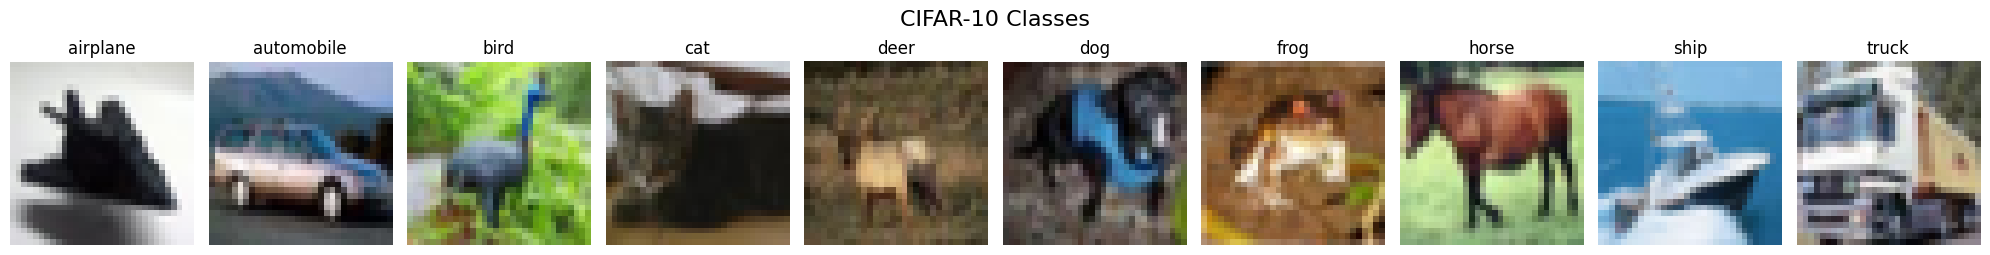

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))

for i in range(10):
    image = x_train[y_train.flatten() == i]
    axs[i].imshow(image[0])
    axs[i].set_title(classes[i])
    axs[i].axis('off')

plt.tight_layout()
plt.suptitle('CIFAR-10 Classes', fontsize=16)

plt.show()

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten

def model(input_shape):
  '''
  This function returns a compiled CNN with specifications given above.
  '''

  #Defining the architecture of the CNN
  input_layer = Input(shape=input_shape, name='input')
  
  h = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_1')(input_layer)
  h = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_2')(h)


  h = MaxPool2D(pool_size=(2,2), name='pool_1')(h)

  h = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_3')(h)
  h = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_4')(h)

  h = MaxPool2D(pool_size=(2,2), name='pool_2')(h)

  h = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_5')(h)
  h = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_6')(h)

  h = Flatten(name='flatten_1')(h)
  output_layer = Dense(10, activation='softmax', name='dense_2')(h)

  #To generate the model, we pass the input layer and the output layer
  model = Model(inputs=input_layer, outputs=output_layer, name='model_CNN')

  #Next we apply the compile method
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [7]:
model_benchmark = model(input_shape=(32,32,3))
model_benchmark.summary()

2025-07-29 09:49:05.869741: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-29 09:49:05.919964: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-29 09:49:05.920267: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 64)          0 

In [9]:
benchmark_layers = model_benchmark.layers
benchmark_input = model_benchmark.input

layer_outputs_benchmark = [layer.output for layer in benchmark_layers]
features_benchmark = Model(inputs=benchmark_input, outputs=layer_outputs_benchmark)

In [10]:
# Extract features from the 10th layer (index 9) for all training images
X = np.array([np.array(features_benchmark(i[np.newaxis,...])[9])[0] for i in x_train])
X.shape

2025-07-29 09:52:40.637719: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


(50000, 8192)

In [11]:
# Perform PCA on the extracted features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
data_pca = pca.transform(X)

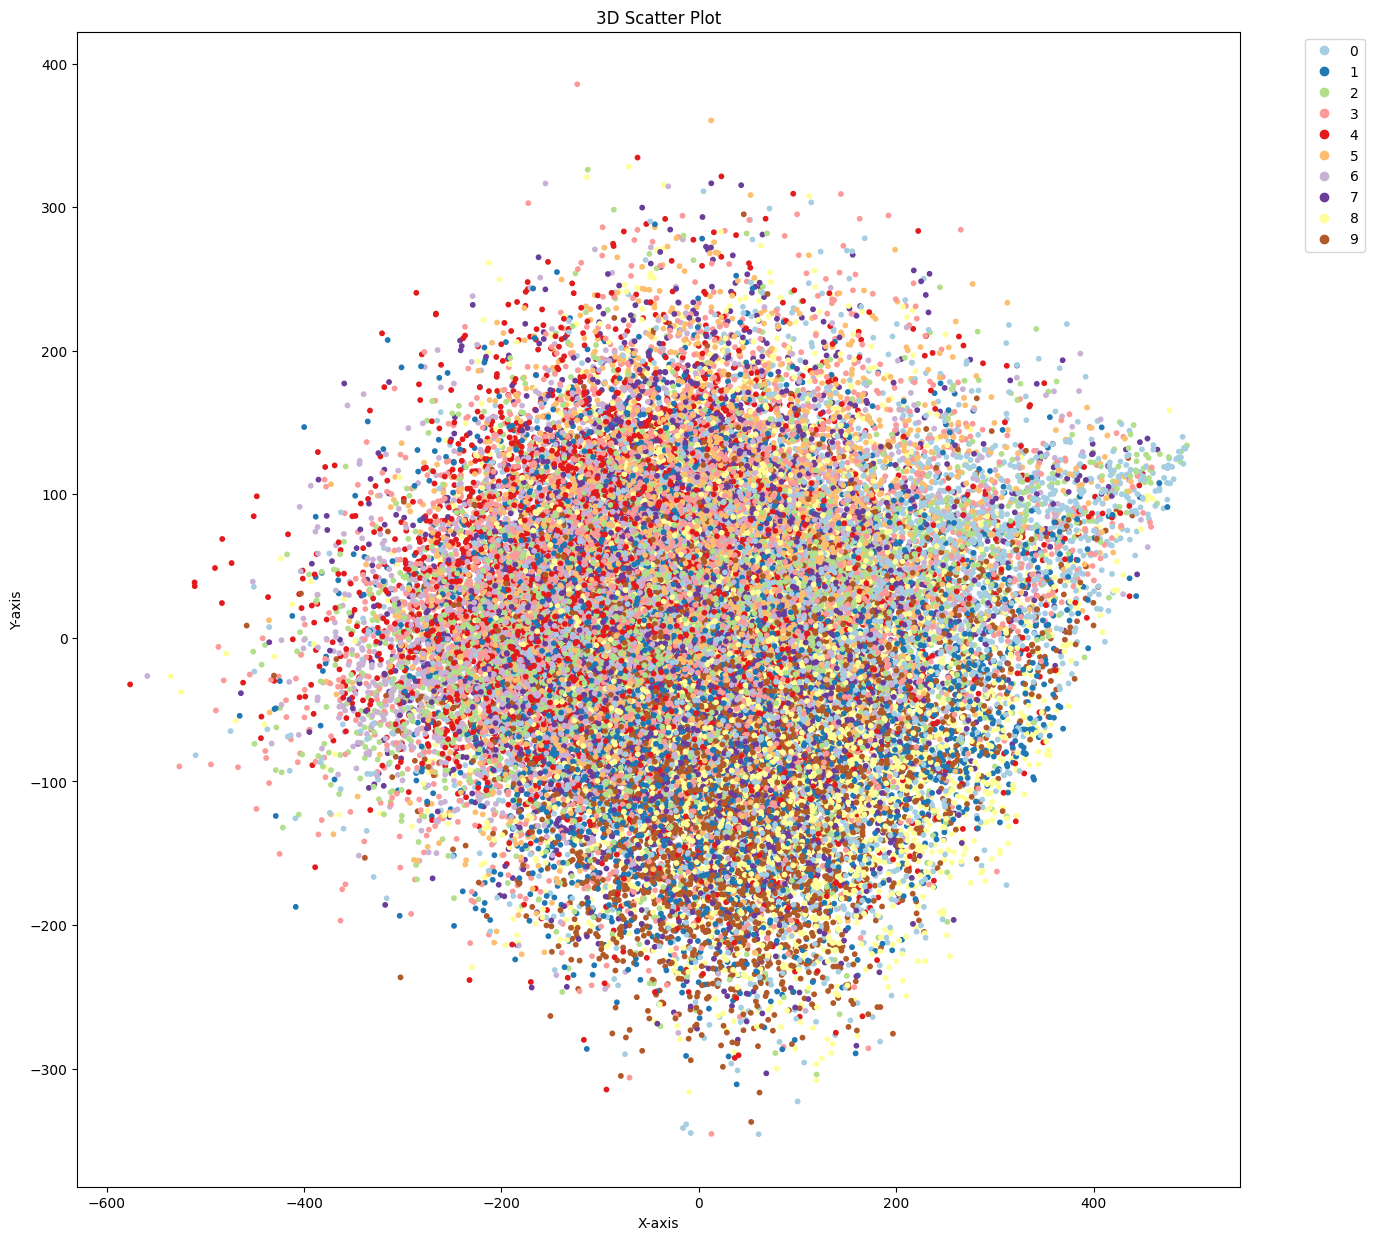

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

d = {'x': data_pca[:,0], 'y': data_pca[:,1]}
df = pd.DataFrame(data=d)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sc = ax.scatter(df['x'], df['y'], c=y_train, cmap='Paired', s=10, alpha=1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('3D Scatter Plot')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_training_reduced_tsne = tsne.fit_transform(X)

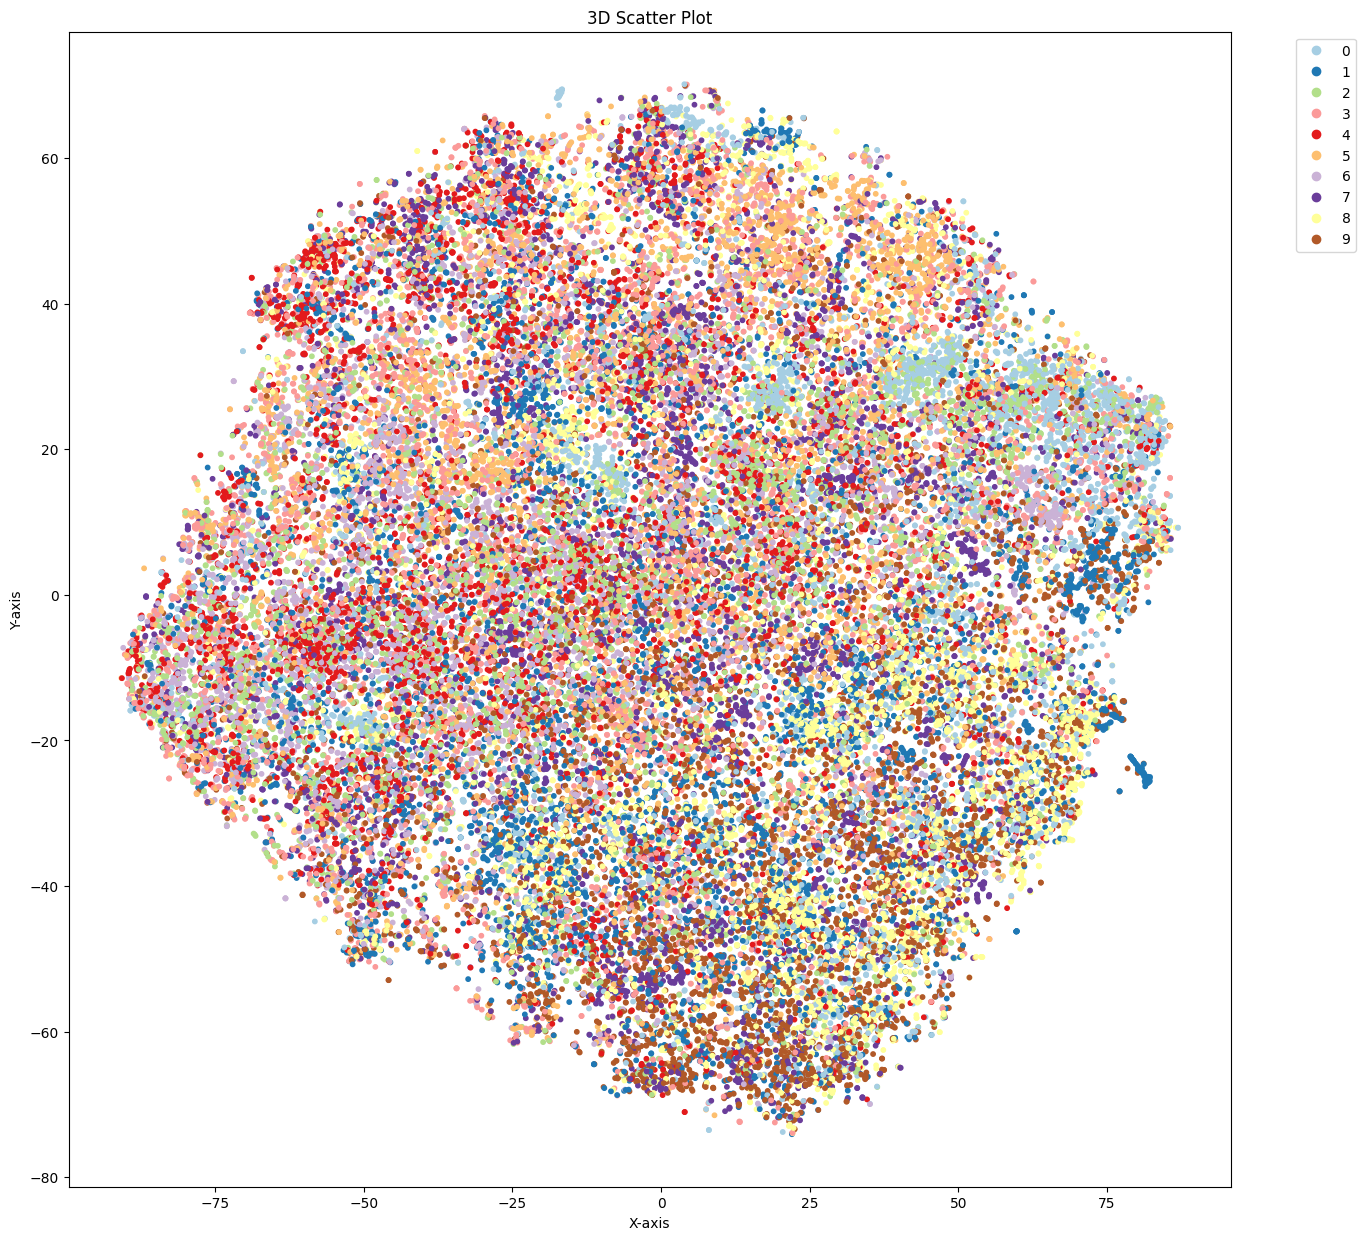

In [13]:
d = {'x': X_training_reduced_tsne[:,0], 'y': X_training_reduced_tsne[:,1]}
df = pd.DataFrame(data=d)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sc = ax.scatter(df['x'], df['y'], c=y_train, cmap='Paired', s=10, alpha=1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('3D Scatter Plot')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()